In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import ast
import itertools
import re
import json

//TO DO
Correlation between independent and dependent variables (in-out),
Correlation between features,
Feature Selection

In [22]:
dataset = pd.read_csv('../data/train.csv')
shape = dataset.shape
print("Shape:", shape)
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

Shape: (3000, 23)


The columns we have are:

    Data Description id - Unique id of each movie.

    belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. Missing values are coded as NaN.

    budget: Budget of a movie in dollars. Missing values are coded as 0.

    genres : Contains all the Genres Name & TMDB Id in JSON Format.

    homepage - Contains the official homepage URL of a movie.

    imdb_id - IMDB id of a movie (string).

    original_language - Two digit code of the original language, in which the movie was made.

    original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

    overview - Short description of the movie.

    popularity - Popularity score of the movie.

    poster_path - Path of a movie's poster.

    production_companies - All production companies names and TMDB id in JSON format.

    production_countries - Two digit code and full name of the production company in JSON format.

    release_date - Release date of a movie in mm/dd/yy format.

    runtime - Total runtime of a movie in minutes.

    spoken_languages - Two digit code and full name of the spoken language.

    status - Releas status of the movie: released or rumored.

    tagline - Tagline of a movie

    title - English title of a movie

    Keywords - TMDB Id and name of all the keywords in JSON format.

    cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

    crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

    revenue - Total revenue earned by a movie in dollars.

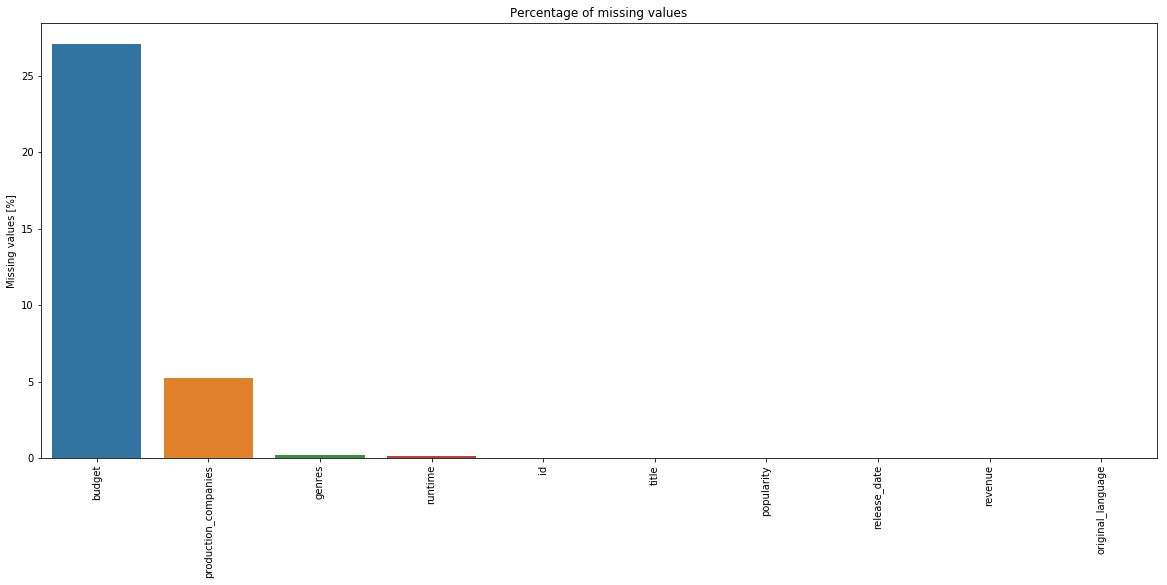

In [23]:
fields = dataset[["id", "title", "budget", "genres", "popularity", "release_date", "runtime", "revenue", "production_companies", "original_language"]]
pct_nans = round(fields.isnull().sum()/shape[0]*100,1).to_frame().sort_values(by=[0], ascending=False)
pct_nans.iloc[5,] = round((fields[["budget"]]==0).sum()/shape[0]*100,1).to_frame().iloc[0,0]
pct_nans = pct_nans.sort_values(by=[0], ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=pct_nans.index, y=pct_nans[0])
plt.xticks(rotation=90)
plt.title("Percentage of missing values")
plt.ylabel("Missing values [%]")
plt.show()

In [24]:
fields.head()

,id,title,budget,genres,popularity,release_date,runtime,revenue,production_companies,original_language
0,1,Hot Tub Time Machine 2,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2/20/15,93.0,12314651,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",en
1,2,The Princess Diaries 2: Royal Engagement,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,8/6/04,113.0,95149435,"[{'name': 'Walt Disney Pictures', 'id': 2}]",en
2,3,Whiplash,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,10/10/14,105.0,13092000,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",en
3,4,Kahaani,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,3/9/12,122.0,16000000,NaN,hi
4,5,Marine Boy,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.148070,2/5/09,118.0,3923970,NaN,ko


In [12]:
fields.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [78]:
def get_genres(row):
    if type(row) != type("str") and np.isnan(row):
            return "None"
    
    row = ast.literal_eval(row)
    genres = []
    for genre in row:
        genres.append(genre.get("name"))
    return genres
    
def get_release_date(row):
    yr = re.findall(r"\d+/\d+/(\d+)",row)

    if int(yr[0]) >= 18:
        return(row[:-2] + "19" + yr[0])
    else:
        return(row[:-2] + "20" + yr[0])
    
def get_production_companies(row):
    if pd.isna(row):
        return "None"
    
    row = ast.literal_eval(row)
    row[0].get("name")
    companies = []
    for companie in row:
        companies.append(companie.get("name"))
    return [row[0].get("name")]

In [26]:
fields.loc[:, "production_companies"] = dataset["production_companies"].apply(get_production_companies).values
fields.loc[:, "release_date"] = dataset["release_date"].apply(get_release_date).values
fields.loc[:, "genres"] = dataset["genres"].apply(get_genres).values
fields.loc[:, "release_date"] = pd.to_datetime(fields.loc[:, "release_date"])
fields.loc[:,"release_year"] = fields.loc[:,"release_date"].dt.year
fields.loc[:,"release_month"] = fields.loc[:,"release_date"].dt.month

/home/claudiom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/claudiom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [99]:
a = dataset["production_companies"].apply(get_production_companies)
len(a.apply(pd.Series).stack().unique())
list_of_companies = a.apply(lambda x: [i for i in x] if x != "None" else []).apply(pd.Series).stack()

companies_overall = np.array(Counter(list_of_companies).most_common(30))
pd.to_numeric(companies_overall[:,1]).sum()

1263

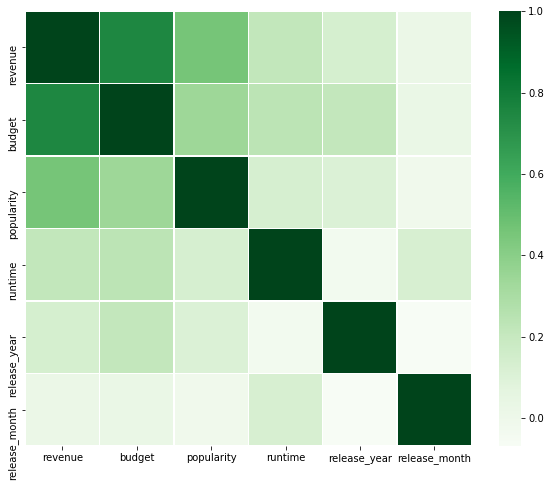

In [27]:
columns = ['revenue','budget','popularity','runtime', 'release_year', 'release_month']
plt.subplots(figsize=(10, 8))
correlations = fields[columns].corr()
sns.heatmap(correlations, xticklabels=columns,yticklabels=columns, linewidths=.5, cmap="Greens")

In [28]:
unique_genres = fields["genres"].apply(pd.Series).stack().unique()

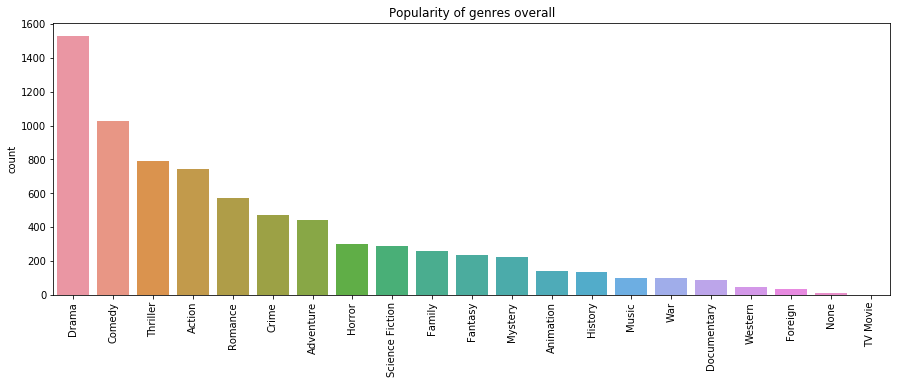

In [37]:
genres_dummies = pd.get_dummies(fields["genres"].apply(pd.Series).stack()).sum(level=0)
genres_dummies.head()
fields_genres = pd.concat([fields, genres_dummies],axis=1, sort=False)
fields_genres.head(5)

genres_overall = fields_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Popularity of genres overall")
plt.ylabel("count")
plt.show()

In [30]:
genres_overall

Drama              1531
Comedy             1028
Thriller            789
Action              741
Romance             571
Crime               469
Adventure           439
Horror              301
Science Fiction     290
Family              260
Fantasy             232
Mystery             225
Animation           141
History             132
Music               100
War                 100
Documentary          87
Western              43
Foreign              31
None                  7
TV Movie              1
dtype: int64

In [20]:
dataset['production_companies'].apply(lambda x: len(ast.literal_eval(x)) if not(pd.isna(x)) else 0).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

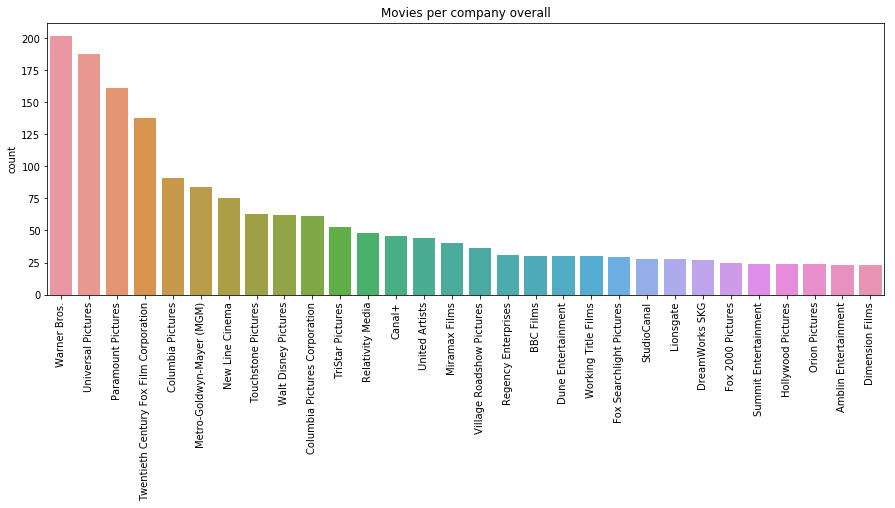

In [350]:
from collections import Counter
unique_companies = fields["production_companies"].apply(pd.Series).stack().unique()
list_of_companies = fields['production_companies'].apply(lambda x: [i for i in x] if x != "None" else []).apply(pd.Series).stack()

companies_overall = np.array(Counter(list_of_companies).most_common(30))
plt.figure(figsize=(15,5))
ax = sns.barplot(x=companies_overall[:, 0], y=companies_overall[:, 1].astype(int))
plt.xticks(rotation=90)
plt.title("Movies per company overall")
plt.ylabel("count")
plt.show()

In [71]:
from collections import Counter
# unique_companies = fields["production_companies"].apply(pd.Series).stack().unique()
list_of_companies = fields['production_companies'].apply(lambda x: [i for i in x] if x != "None" else []).apply(pd.Series).stack()

companies_overall = np.array(Counter(list_of_companies).most_common(30))
list_of_companies

0     0                        Paramount Pictures
      1                            United Artists
      2                 Metro-Goldwyn-Mayer (MGM)
1     0                      Walt Disney Pictures
2     0                                Bold Films
      1                     Blumhouse Productions
      2                        Right of Way Films
6     0                      Ghost House Pictures
      1                     North Box Productions
8     0                      Walt Disney Pictures
      1                    Jim Henson Productions
      2                   Jim Henson Company, The
9     0                 Castle Rock Entertainment
10    0                            United Artists
11    0    Twentieth Century Fox Film Corporation
      1                            Amercent Films
      2      American Entertainment Partners L.P.
      3                 Interscope Communications
12    0                            DreamWorks SKG
      1                       Jinks/Cohen Company


<Figure size 1080x360 with 0 Axes>

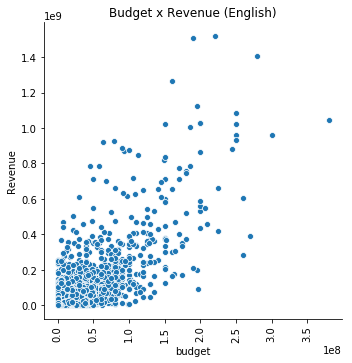

<Figure size 1080x360 with 0 Axes>

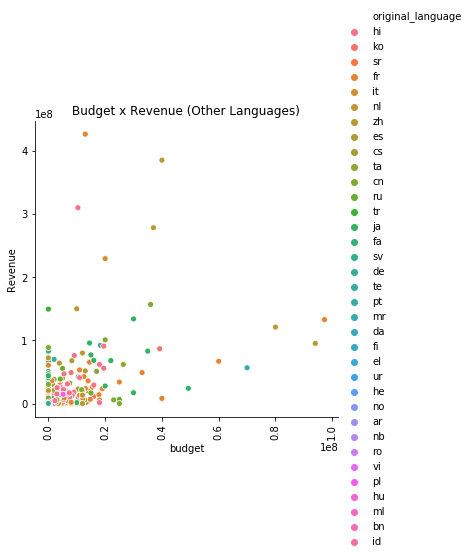

In [15]:
# Sugiro usar dois classificadores, um só para quando for inglês e outro para as outras linguagens

plt.figure(figsize=(15,5))
ax = sns.relplot(x="budget", y="revenue", data=fields[fields.original_language=="en"])
plt.xticks(rotation=90)
plt.title("Budget x Revenue (English)")
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize=(15,5))
ax = sns.relplot(x="budget", y="revenue", hue="original_language", data=fields[fields.original_language!="en"])
plt.xticks(rotation=90)
plt.title("Budget x Revenue (Other Languages)")
plt.ylabel("Revenue")
plt.show()

<Figure size 1080x360 with 0 Axes>

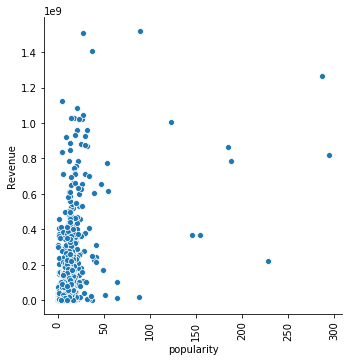

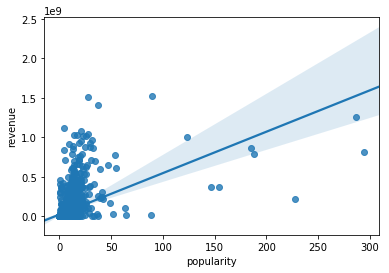

In [16]:
plt.figure(figsize=(15,5))
ax = sns.relplot(x="popularity", y="revenue", data=fields)
plt.xticks(rotation=90)
plt.ylabel("Revenue")
plt.show()

sns.regplot(x="popularity", y="revenue", data=fields)

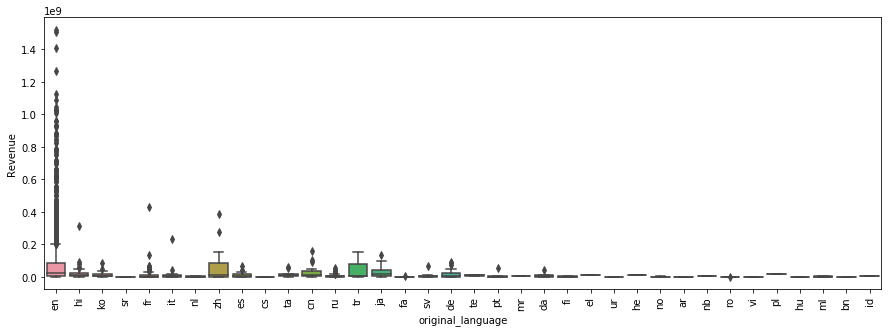

In [17]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(x="original_language", y="revenue", data=fields)
plt.xticks(rotation=90)
plt.ylabel("Revenue")
plt.show()

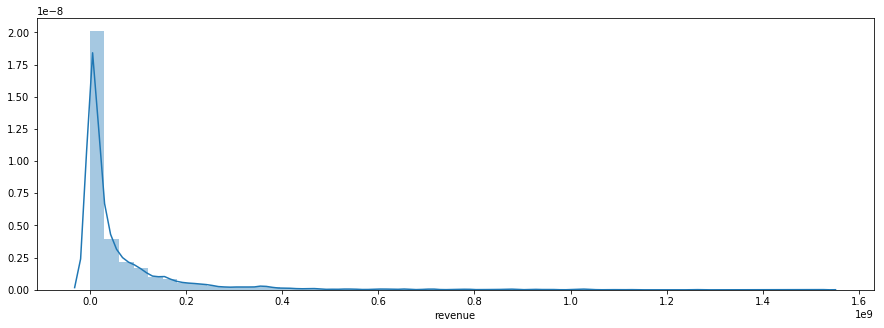

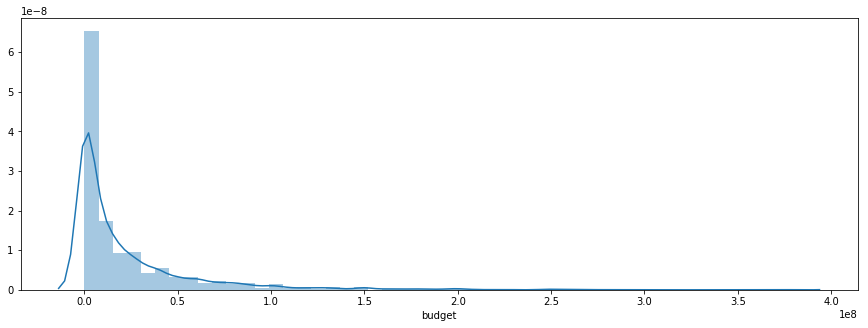

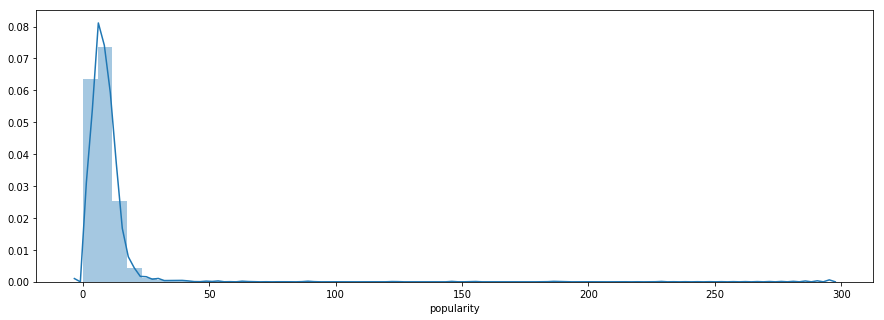

In [18]:
plt.figure(figsize=(15,5))
ax = sns.distplot(fields["revenue"])
plt.show()

plt.figure(figsize=(15,5))
ax = sns.distplot(fields["budget"])
plt.show()

plt.figure(figsize=(15,5))
ax = sns.distplot(fields["popularity"])
plt.show()

/home/claudiom/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/claudiom/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


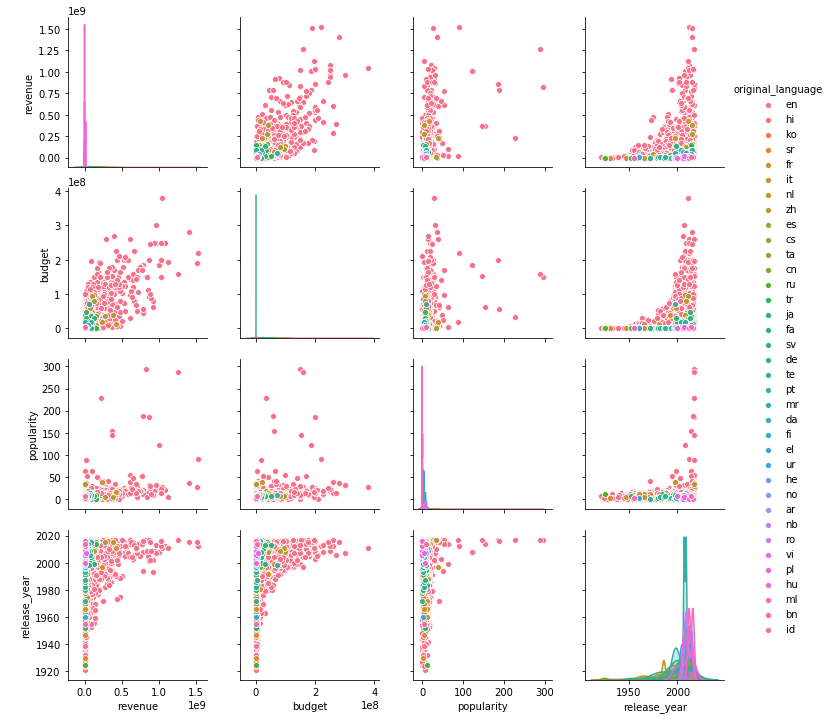

In [44]:
columns = ['revenue','budget','popularity', 'original_language', 'release_year']
sns.pairplot(fields[columns], hue='original_language')


/home/claudiom/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/claudiom/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


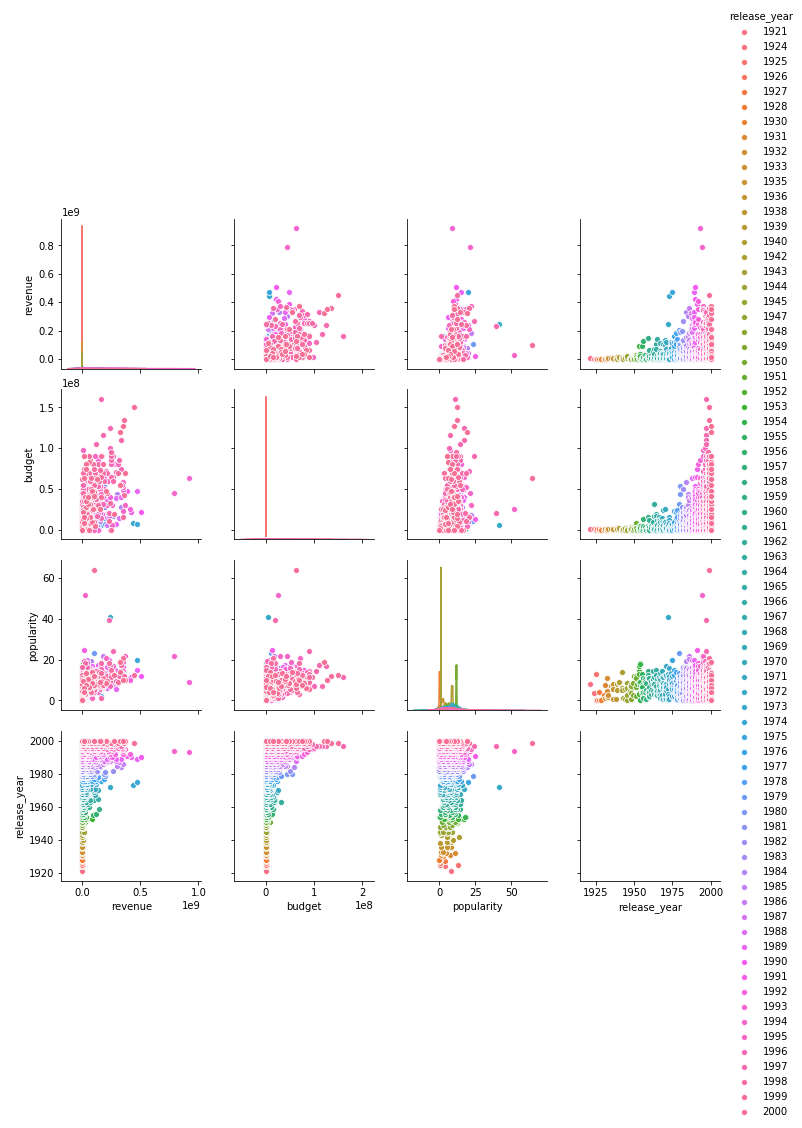

In [65]:
columns = ['revenue','budget','popularity', 'release_year']
a = fields[fields.release_year <=2000]
sns.pairplot(a[columns], hue='release_year')